1. Make classification data and get it ready

In [13]:
from sklearn.datasets import make_circles

# make 1000 circles
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [14]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y features:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y features:
[1 1 1 1 0]


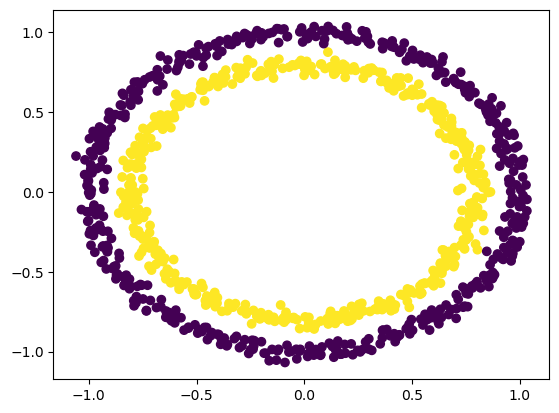

In [15]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], y=X[:,1], c=y)

1.1 Input and output shapes

In [16]:
X.shape, y.shape

((1000, 2), (1000,))

In [17]:
# view the first example
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


1.2 Turn data into tensors and create train and test splits

In [18]:
# turn data into tensors
# otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

2. Building a model

In [21]:
import torch
from torch import nn

class CircleModel0(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        # create 2 nn.linear layers capable of handling X and y
        self.layer_1 = nn.Linear(2, 5)
        self.layer_2 = nn.Linear(5, 1)

    def forward(self, x):
        return self.layer_2(self.layer_1(x))
    
model_0 = CircleModel0()
model_0

CircleModel0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
# Make predictions with the model
untrained_preds = model_0(X_test)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[0.2232],
        [0.2593],
        [0.1927],
        [0.2316],
        [0.2947],
        [0.3160],
        [0.3369],
        [0.3504],
        [0.1884],
        [0.2629]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [24]:
# create a loss fn
loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [40]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

3. Train model

In [30]:
torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):

    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss}, Accuracy: {acc}% | Test loss: {test_loss}, Test acc: {test_acc}%")
    

Epoch: 0 | Loss: 0.6934405565261841, Accuracy: 50.5% | Test loss: 0.6943492293357849, Test acc: 50.5%
Epoch: 10 | Loss: 0.6933850049972534, Accuracy: 50.625% | Test loss: 0.6943210363388062, Test acc: 51.0%
Epoch: 20 | Loss: 0.6933364272117615, Accuracy: 50.5% | Test loss: 0.6942989826202393, Test acc: 50.5%
Epoch: 30 | Loss: 0.6932939291000366, Accuracy: 50.74999999999999% | Test loss: 0.6942822337150574, Test acc: 51.0%
Epoch: 40 | Loss: 0.6932563781738281, Accuracy: 51.0% | Test loss: 0.6942699551582336, Test acc: 51.0%
Epoch: 50 | Loss: 0.6932235956192017, Accuracy: 51.0% | Test loss: 0.6942614912986755, Test acc: 50.5%
Epoch: 60 | Loss: 0.6931948065757751, Accuracy: 51.0% | Test loss: 0.6942563652992249, Test acc: 49.5%
Epoch: 70 | Loss: 0.6931694746017456, Accuracy: 50.875% | Test loss: 0.6942539811134338, Test acc: 49.0%
Epoch: 80 | Loss: 0.6931473016738892, Accuracy: 51.24999999999999% | Test loss: 0.6942539811134338, Test acc: 48.0%
Epoch: 90 | Loss: 0.6931275725364685, Accura

In [31]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



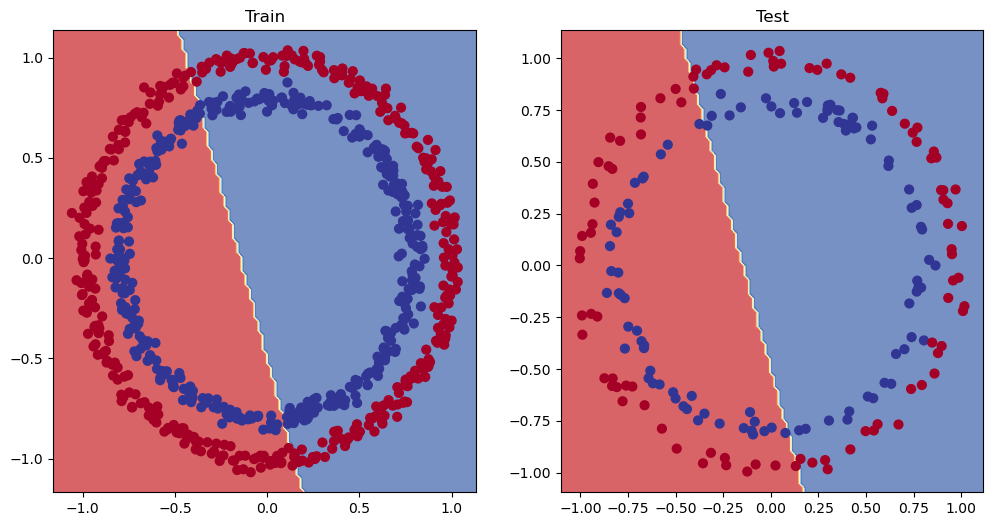

In [32]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [33]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [34]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [35]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [36]:
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):

    model_3.train()

    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


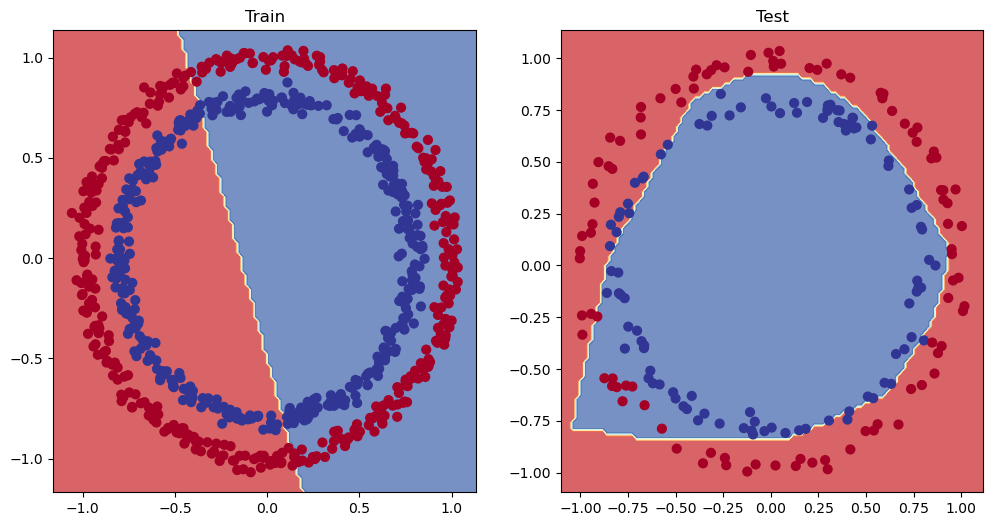

In [37]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity


tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


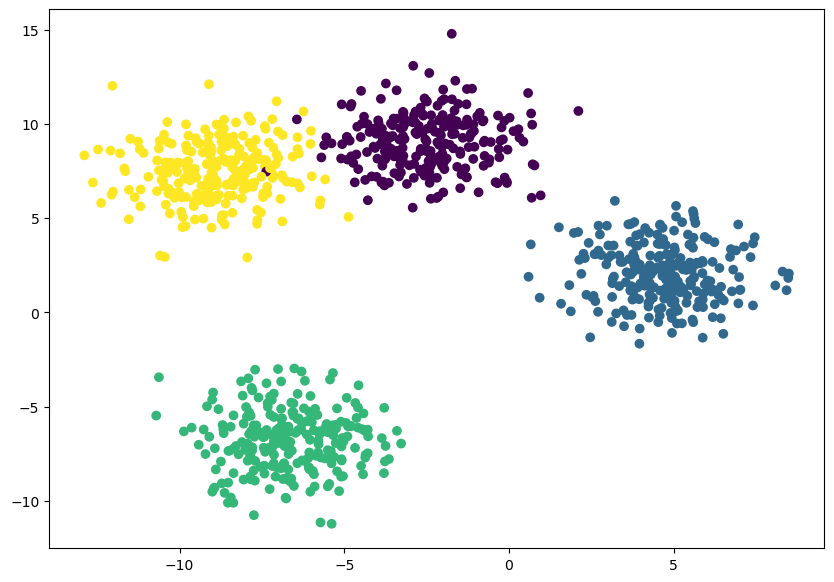

In [14]:
# Multi-class model

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. create multi class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. split data
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob)

In [26]:
from torch import nn

class BlobModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 4),
            )

    def forward(self, x):
        output = self.linear_layer_stack(x)
        return output
    
model_4 = BlobModel()
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=4, bias=True)
  )
)

In [27]:
model_4(X_blob_test)

tensor([[-0.6275, -0.0263,  0.4105, -0.2881],
        [-0.1864, -0.3265, -0.6985, -0.8258],
        [-0.4274, -0.2100, -0.7616, -0.4180],
        [-0.3362,  0.2067,  0.3564, -0.2991],
        [-0.4431, -0.1350, -0.3469,  0.0273],
        [-0.2086, -0.4354, -0.7646, -0.9867],
        [-0.3798, -0.1501, -0.6926, -0.4634],
        [-0.2290, -0.0760, -0.5459, -0.1326],
        [-0.4302, -0.3311, -0.9299, -0.4002],
        [-0.2995, -0.0918, -0.4454, -0.0712],
        [-0.1759, -0.0712, -0.6049, -0.2636],
        [-0.6825, -0.0198,  0.5879, -0.3495],
        [-0.3873, -0.1298, -0.4013, -0.0172],
        [-0.2818, -0.1264, -0.5177, -0.0993],
        [-0.3377, -0.1578, -0.4951, -0.0741],
        [-0.1799, -0.2561, -0.6737, -0.6926],
        [-0.1882, -0.3454, -0.7057, -0.8611],
        [-0.2765, -0.0823, -0.6223, -0.2939],
        [-0.2019, -0.3762, -0.7679, -0.8452],
        [-0.2421, -0.3478, -0.6544, -0.8850],
        [-0.1890, -0.2821, -0.7160, -0.6941],
        [-0.1816, -0.0178, -0.5396

In [28]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

In [51]:
y_logits = model_6(X_test)

y_pred_probs = torch.softmax(y_logits, dim=1).argmax(dim=1)

print(y_pred_probs[:5])
print(y_test[:5])

tensor([1, 1, 1, 1, 1])
tensor([0, 0, 0, 2, 2])


In [30]:
torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):

    model_4.train()

    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.52733, Acc: 3.38% | Test Loss: 1.20977, Test Acc: 11.50%
Epoch: 10 | Loss: 0.35169, Acc: 98.50% | Test Loss: 0.31741, Test Acc: 100.00%
Epoch: 20 | Loss: 0.13269, Acc: 99.00% | Test Loss: 0.12279, Test Acc: 99.50%
Epoch: 30 | Loss: 0.07663, Acc: 99.00% | Test Loss: 0.06976, Test Acc: 99.50%
Epoch: 40 | Loss: 0.05715, Acc: 99.00% | Test Loss: 0.05032, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04773, Acc: 99.00% | Test Loss: 0.04059, Test Acc: 99.50%
Epoch: 60 | Loss: 0.04228, Acc: 99.00% | Test Loss: 0.03483, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03878, Acc: 99.00% | Test Loss: 0.03103, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03635, Acc: 99.00% | Test Loss: 0.02834, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03458, Acc: 99.00% | Test Loss: 0.02634, Test Acc: 99.50%


In [31]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  0.9542,   7.2044,  -1.1233,  -5.1161],
        [ -1.0387,  -6.3592,  -2.8841,   4.6100],
        [ -8.6197,  -3.3571,   5.2622,  -2.2018],
        [ -0.3988,   5.3618,  -0.7317,  -3.2564],
        [  6.5800,   1.4380,  -4.4143,  -1.6403],
        [ -1.5341,  -7.6807,  -3.2302,   5.5302],
        [ -7.5670,  -2.9151,   4.5387,  -1.8409],
        [  6.2963,  -1.1466,  -4.2531,   0.1255],
        [-10.4211,  -4.5448,   6.1857,  -2.2904],
        [  6.3474,  -0.3025,  -4.2126,  -0.5201]])

In [32]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


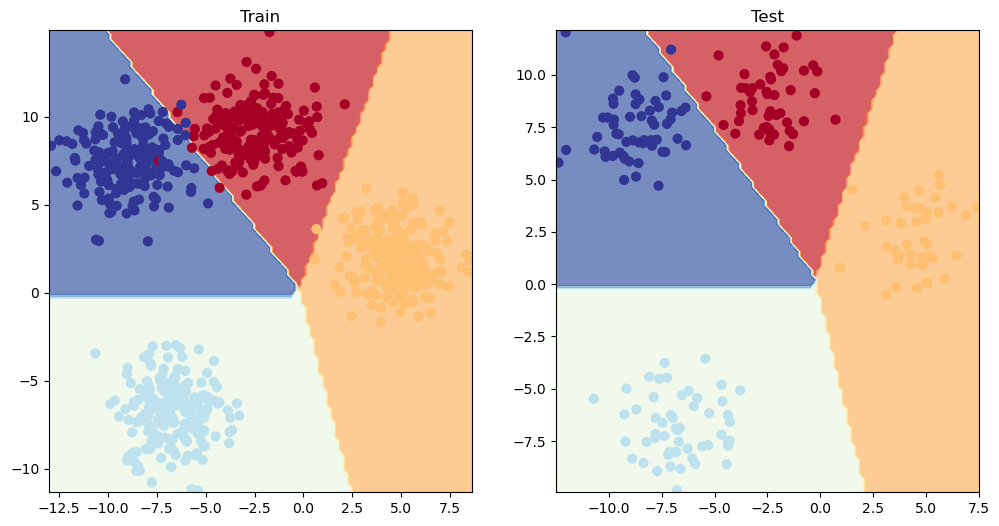

In [33]:
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [13]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(1000, random_state=42, noise=0.07)

tensor([[-0.0334,  0.4214],
        [ 0.9988, -0.4429],
        [ 0.8896, -0.3278],
        [ 0.3420, -0.4177],
        [-0.8385,  0.5324]]) tensor([1., 1., 1., 1., 0.])


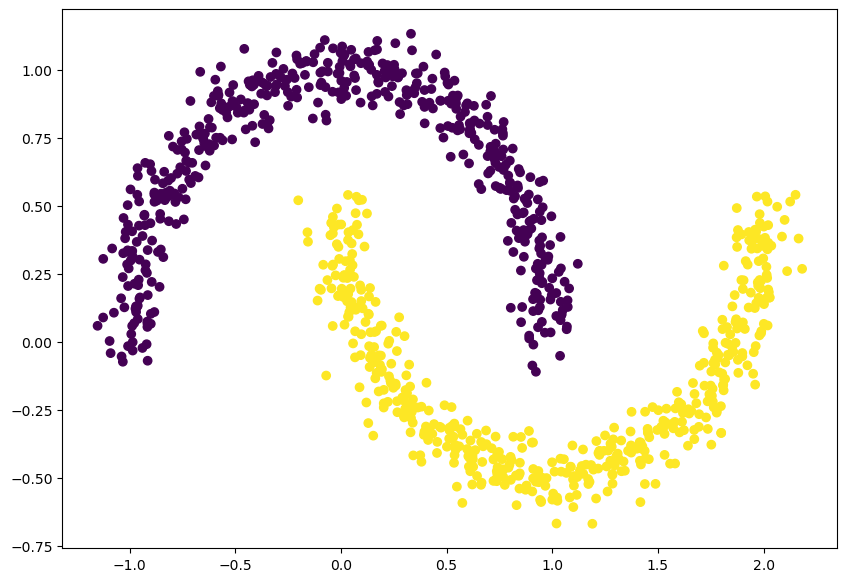

In [14]:
# 2. turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(X[:5], y[:5])

# 3. split data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

# 4. plot data
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=y)

In [15]:
# create a model
from torch import nn

class MoonClassification(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
        )

    def forward(self, x):
        return self.linear_relu_stack(x)
    
model_5 = MoonClassification()

In [16]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_5.parameters(), lr=0.1)

In [17]:
# logits (raw outputs of model)
print("Logits:")
print(model_5(X_train[:10]).squeeze())

# Prediction probabilities
print("Pred probs:")
print(torch.sigmoid(model_5(X_train[:10]).squeeze()))

# Prediction probabilities
print("Pred labels:")
print(torch.round(torch.sigmoid(model_5(X_train[:10]).squeeze())))

Logits:
tensor([0.1011, 0.0721, 0.0553, 0.0563, 0.1057, 0.0619, 0.1173, 0.0897, 0.0796,
        0.0632], grad_fn=<SqueezeBackward0>)
Pred probs:
tensor([0.5253, 0.5180, 0.5138, 0.5141, 0.5264, 0.5155, 0.5293, 0.5224, 0.5199,
        0.5158], grad_fn=<SigmoidBackward0>)
Pred labels:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<RoundBackward0>)


In [18]:
# Let's calculate the accuracy

from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=2) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [22]:
epochs = 500

for epoch in range(epochs):

    model_5.train()

    y_logits = model_5(X_train).squeeze()
    # print(y_logits[:5]) # model raw outputs are "logits"
    y_pred_probs = torch.sigmoid(y_logits)
    y_pred = torch.round(y_pred_probs)

    # 2. Calculaute the loss
    loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs
    acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_5.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_5(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate the loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = acc_fn(test_pred, y_test.int()) 

      # Print out what's happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.68 Acc: 0.50 | Test loss: 0.68 Test acc: 0.50
Epoch: 100 | Loss: 0.30 Acc: 0.86 | Test loss: 0.31 Test acc: 0.84
Epoch: 200 | Loss: 0.20 Acc: 0.92 | Test loss: 0.20 Test acc: 0.92
Epoch: 300 | Loss: 0.15 Acc: 0.93 | Test loss: 0.15 Test acc: 0.94
Epoch: 400 | Loss: 0.11 Acc: 0.96 | Test loss: 0.11 Test acc: 0.97


In [23]:
import numpy as np

# TK - this could go in the helper_functions.py and be explained there
def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

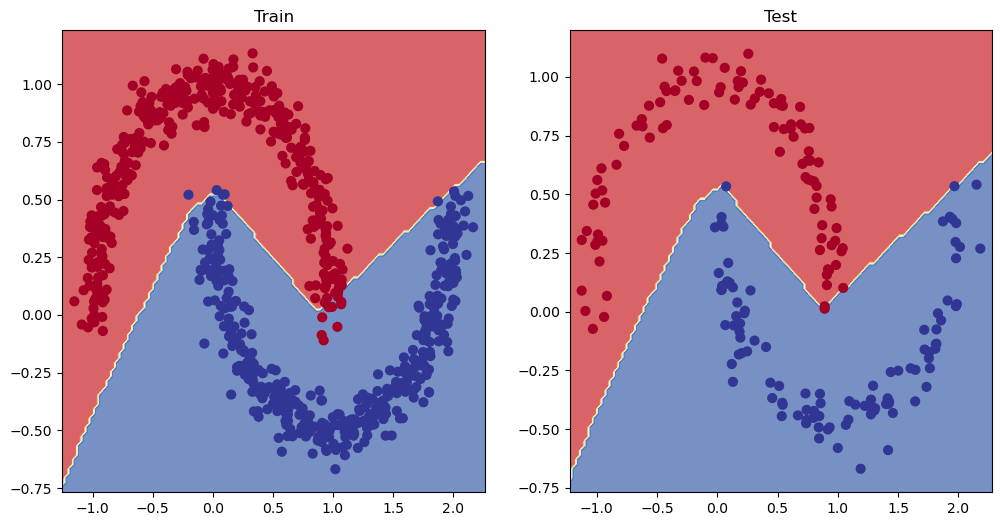

In [24]:


# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_5, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_5, X_test, y_test)

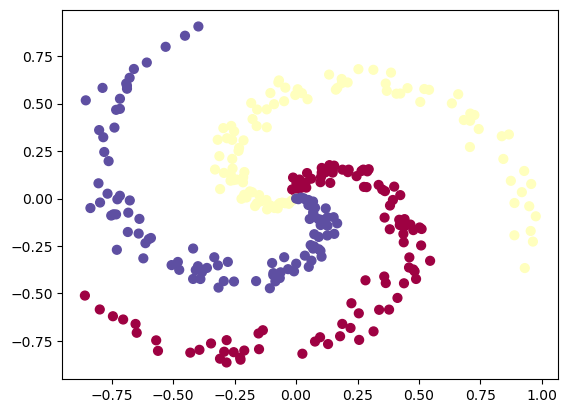

In [25]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [27]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)



In [28]:
class SpiralClassifiction(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 3),
        )

    def forward(self, x):
        return self.linear_relu_stack(x)
    
model_6 = SpiralClassifiction()

In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_6.parameters(), lr=0.1)

In [37]:
torch.softmax(model_6(X_train), dim=1)

tensor([[0.3046, 0.4075, 0.2879],
        [0.2994, 0.4170, 0.2836],
        [0.2824, 0.4312, 0.2864],
        [0.2829, 0.4278, 0.2892],
        [0.2881, 0.4352, 0.2766],
        [0.2781, 0.4465, 0.2754],
        [0.3014, 0.4123, 0.2863],
        [0.2777, 0.4476, 0.2748],
        [0.2853, 0.4190, 0.2958],
        [0.2862, 0.4172, 0.2966],
        [0.2836, 0.4299, 0.2865],
        [0.2870, 0.4271, 0.2859],
        [0.2835, 0.4370, 0.2795],
        [0.2788, 0.4404, 0.2808],
        [0.2792, 0.4469, 0.2739],
        [0.2822, 0.4271, 0.2907],
        [0.2815, 0.4301, 0.2884],
        [0.2862, 0.4341, 0.2797],
        [0.2821, 0.4306, 0.2873],
        [0.2862, 0.4291, 0.2847],
        [0.2831, 0.4287, 0.2882],
        [0.2882, 0.4352, 0.2766],
        [0.2848, 0.4187, 0.2965],
        [0.2909, 0.4308, 0.2782],
        [0.2817, 0.4394, 0.2789],
        [0.2833, 0.4401, 0.2766],
        [0.2885, 0.4290, 0.2825],
        [0.2788, 0.4403, 0.2809],
        [0.2870, 0.4346, 0.2784],
        [0.281

In [56]:
epochs = 1000

for epoch in range(epochs):

    # train model
    model_6.train()

    # forward pass
    logits = model_6(X_train)
    pred = torch.softmax(logits, dim=1).argmax(dim=1)
    
    y_pred = torch.softmax(logits, dim=1).argmax(dim=1)

    
    loss = loss_fn(logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # zero grad
    optimizer.zero_grad()

    # backwards
    loss.backward()

    # optim step
    optimizer.step()


    model_6.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_6(X_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                      y_pred=test_pred)

      # Print out what's happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.22 Acc: 92.50 | Test loss: 0.23 Test acc: 91.67
Epoch: 100 | Loss: 0.18 Acc: 94.58 | Test loss: 0.20 Test acc: 91.67
Epoch: 200 | Loss: 0.16 Acc: 95.42 | Test loss: 0.17 Test acc: 91.67
Epoch: 300 | Loss: 0.14 Acc: 95.83 | Test loss: 0.15 Test acc: 93.33
Epoch: 400 | Loss: 0.12 Acc: 96.25 | Test loss: 0.13 Test acc: 95.00
Epoch: 500 | Loss: 0.11 Acc: 96.67 | Test loss: 0.12 Test acc: 95.00
Epoch: 600 | Loss: 0.10 Acc: 97.08 | Test loss: 0.11 Test acc: 96.67
Epoch: 700 | Loss: 0.09 Acc: 97.08 | Test loss: 0.10 Test acc: 96.67
Epoch: 800 | Loss: 0.08 Acc: 97.08 | Test loss: 0.10 Test acc: 96.67
Epoch: 900 | Loss: 0.08 Acc: 97.50 | Test loss: 0.09 Test acc: 96.67


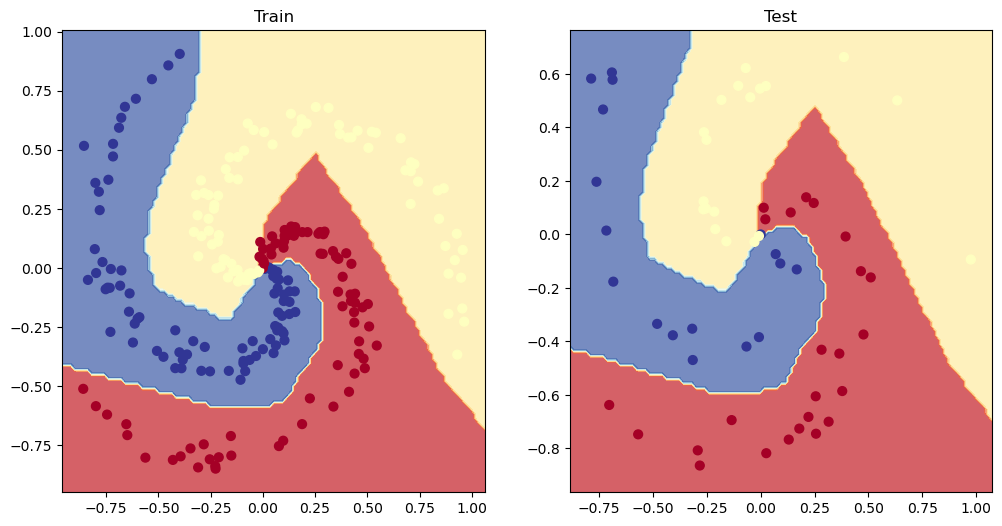

In [57]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_6, X_test, y_test)